In [1]:
import os
import numpy  as np
import matplotlib.pyplot as plt
from antea.io.mc_io import load_sns_positions

In [2]:
filespath = '/Users/carmenromoluque/nexus_petit_analysis/tof_setup/PetBox_analysis/data_h5/'
filename  = filespath + 'PetBox_asymmetric_HamamatsuVUV.2500.pet.h5'
sns_positions = load_sns_positions(filename)

In [3]:
evts_path = '/Users/carmenromoluque/nexus_petit_analysis/tof_setup/PetBox_analysis/data_charge/charge_select_area0_true_info_dists_saveqs/'

tot_charges           = []
dist_ztrue_zsens      = []
dist_true_sens_module = []
all_true_pos          = []
all_charges           = []
all_sns_positions     = []
all_sns_ids           = []
touched_sipms         = []
evt_ids               = []

for filename in os.listdir(evts_path):
    if filename.endswith('thr2pes.npz'):
        my_file   = evts_path+filename
        d = np.load(my_file, allow_pickle=True)
        for i in d['tot_charges']:
            tot_charges.append(i)
        for i in d['dist_ztrue_zsens']:
            dist_ztrue_zsens.append(i)
        for i in d['dist_true_sens_module']:
            dist_true_sens_module.append(i)
        for i in d['all_true_pos']:
            all_true_pos.append(np.array(i))
        for i in d['all_charges']:
            all_charges.append(i)
        for i in d['all_sns_positions']:
            all_sns_positions.append(i)
        for i in d['all_sns_ids']:
            all_sns_ids.append(i)
        for i in d['touched_sipms']:
            touched_sipms.append(i)
        for i in d['evt_ids']:
            evt_ids.append(i)

tot_charges           = np.array(tot_charges          )
dist_ztrue_zsens      = np.array(dist_ztrue_zsens     )
dist_true_sens_module = np.array(dist_true_sens_module)
all_true_pos          = np.array(all_true_pos)
all_charges           = np.array(all_charges)
all_sns_positions     = np.array(all_sns_positions)
all_sns_ids           = np.array(all_sns_ids)
touched_sipms         = np.array(touched_sipms        )
evt_ids               = np.array(evt_ids              )

all_var_rs  = []
all_mean_rs = []
all_mean_xs = []
all_mean_ys = []

for qs, sns_pos in zip(all_charges, all_sns_positions):
    pos_r  = np.array([np.sqrt(p[0]**2 + p[1]**2) for p in sns_pos])
    mean_r = np.average(pos_r, weights=qs)
    var_rs = np.average((pos_r - mean_r)**2, weights=qs)
    all_mean_rs.append(mean_r)
    all_var_rs .append(var_rs)
    
    posx = np.average(sns_pos.T[0], weights=qs)
    posy = np.average(sns_pos.T[1], weights=qs)
    all_mean_xs.append(posx)
    all_mean_ys.append(posy)
    
all_mean_rs = np.array(all_mean_rs)
all_var_rs  = np.array(all_var_rs)
all_mean_xs = np.array(all_mean_xs)
all_mean_ys = np.array(all_mean_ys)

In [4]:
tpos_xs = np.array(all_true_pos.T[0])
tpos_ys = np.array(all_true_pos.T[1])
tpos_zs = np.array(all_true_pos.T[2])
tpos_rs = np.array([np.sqrt(x**2 + y**2) for x,y in zip(tpos_xs, tpos_ys)])

ranges_xy = (-21,21)
ranges_z  = (-54.2,-27)
bins    = 40

sorted_sns_pos = sns_positions.sort_values(by=['sensor_id'])

### Distance between the true pos and the sensor with max charge (module)

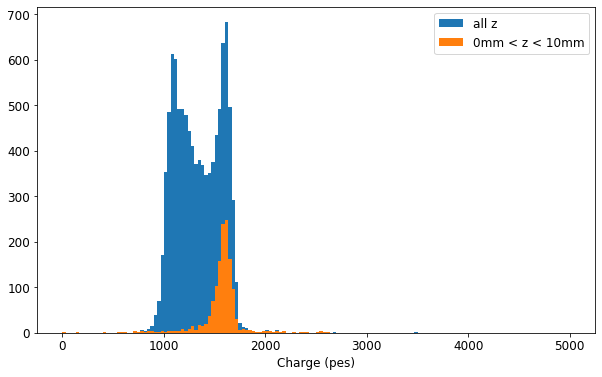

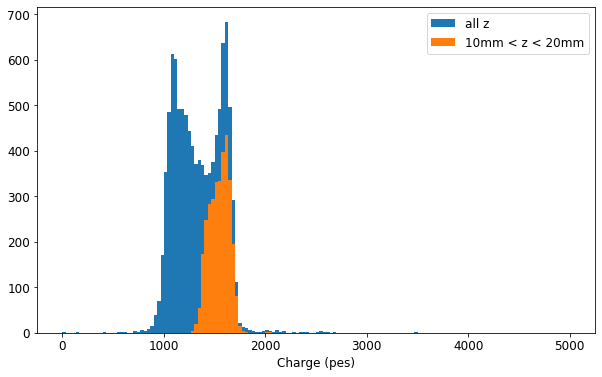

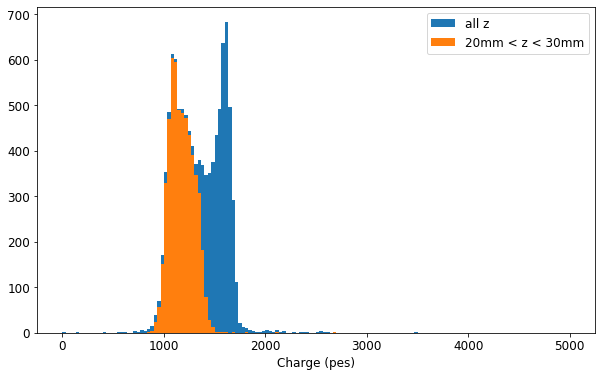

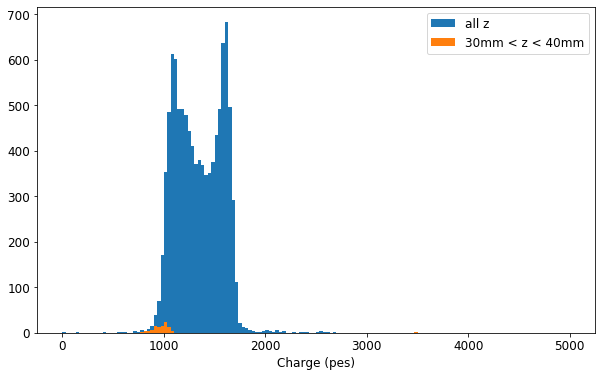

In [5]:
ch_range = (0,5000)

plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["font.size"]      = 12

step = 10
for i in range(0, 33, step):
    sel = (dist_true_sens_module > i) & (dist_true_sens_module <i+step)
    bins = np.histogram(np.hstack((tot_charges, tot_charges[sel])), bins=150, range=ch_range)[1]
    plt.hist(tot_charges     , bins, ch_range, label=f'all z')
    plt.hist(tot_charges[sel], bins, ch_range, label=f'{i}mm < z < {i+step}mm')
    plt.xlabel('Charge (pes)')
    plt.legend()
    plt.show()

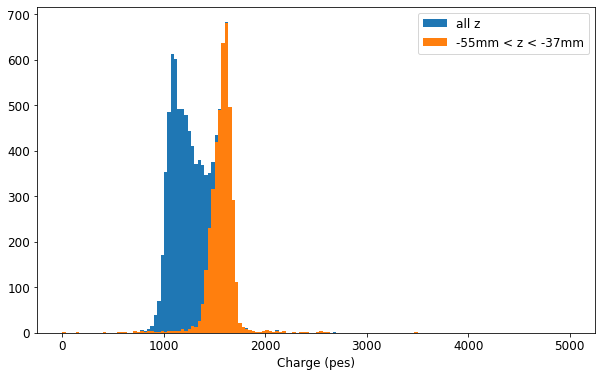

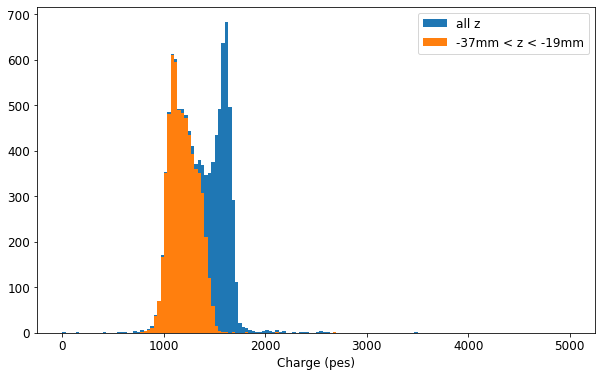

In [6]:
ch_range = (0,5000)

plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["font.size"]      = 12

step = 18
for i in range(-55, -27, step):
    sel = (tpos_zs > i) & (tpos_zs <i+step)
    bins = np.histogram(np.hstack((tot_charges, tot_charges[sel])), bins=150, range=ch_range)[1]
    plt.hist(tot_charges     , bins, ch_range, label=f'all z')
    plt.hist(tot_charges[sel], bins, ch_range, label=f'{i}mm < z < {i+step}mm')
    plt.xlabel('Charge (pes)')
    plt.legend()
    plt.show()

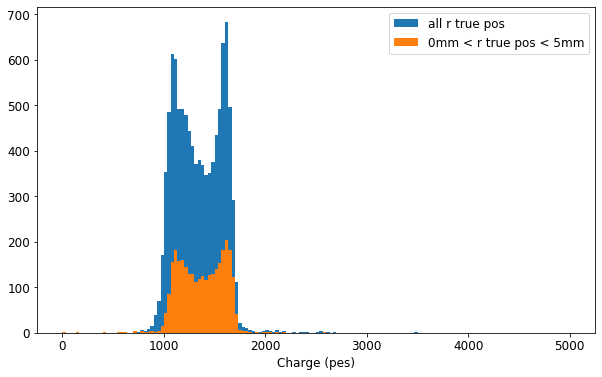

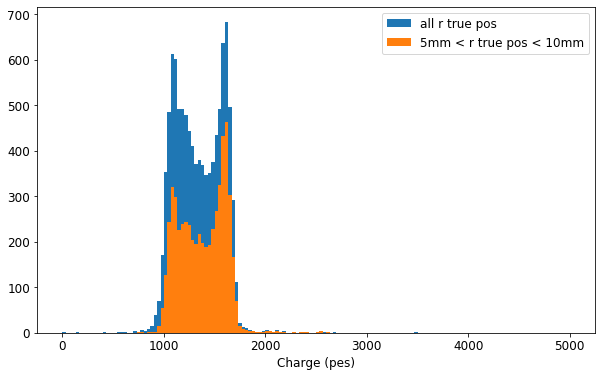

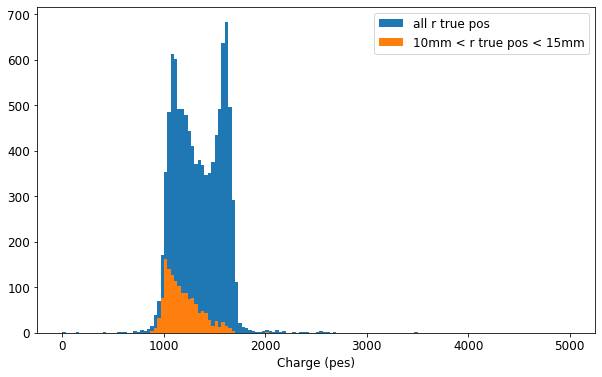

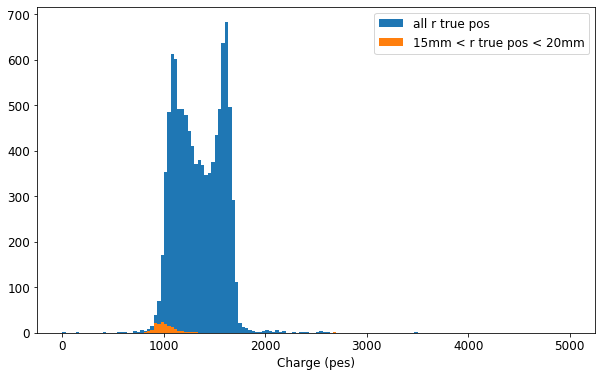

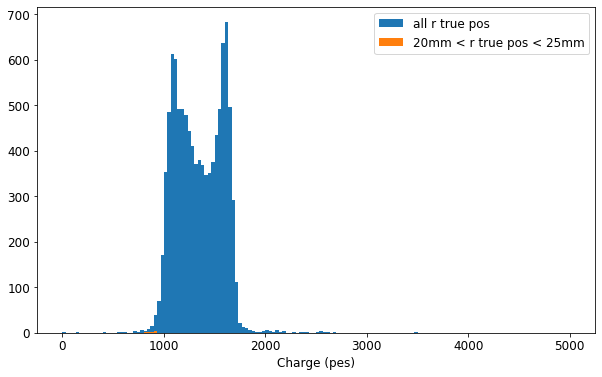

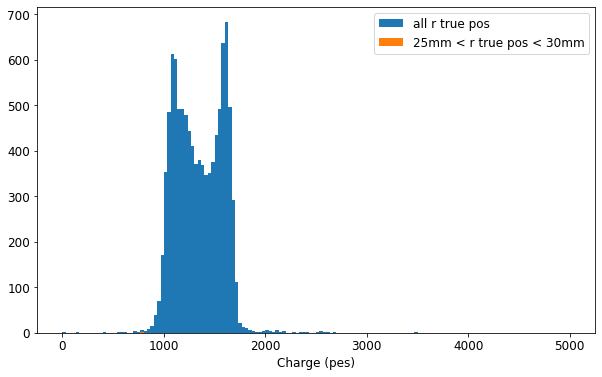

In [7]:
ch_range = (0,5000)
plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["font.size"]      = 12

step = 5
for i in range(0, 26, step):
    sel  = (tpos_rs > i) & (tpos_rs <i+step)
    bins = np.histogram(np.hstack((tot_charges, tot_charges[sel])), bins=150, range=ch_range)[1]
    plt.hist(tot_charges     , bins, ch_range, label=f'all r true pos')
    plt.hist(tot_charges[sel], bins, ch_range, label=f'{i}mm < r true pos < {i+step}mm')
    plt.xlabel('Charge (pes)')
    plt.legend()
    plt.show()

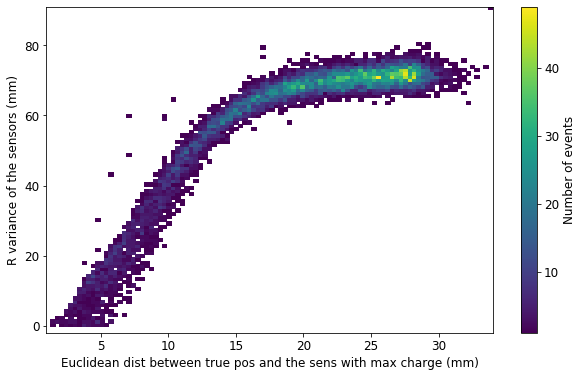

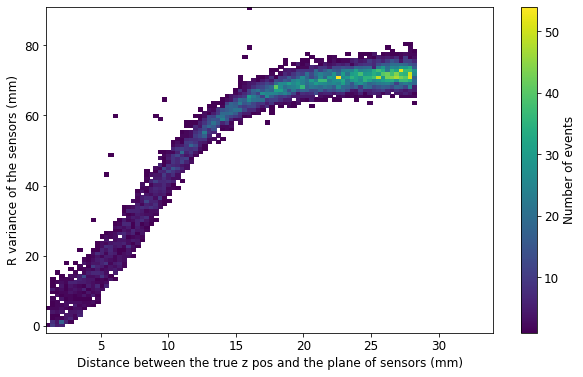

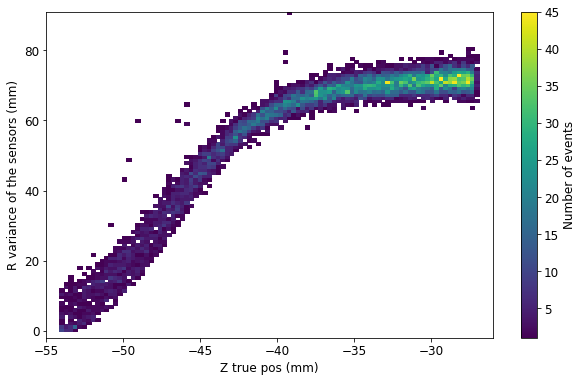

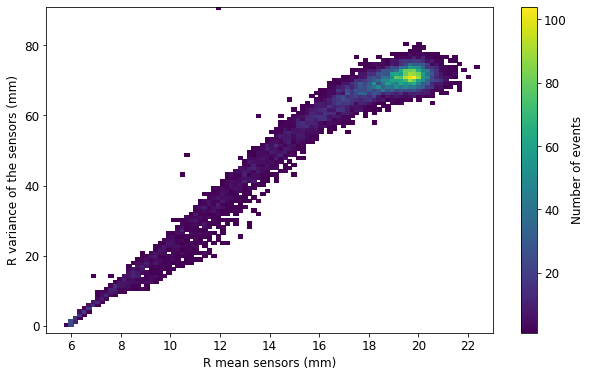

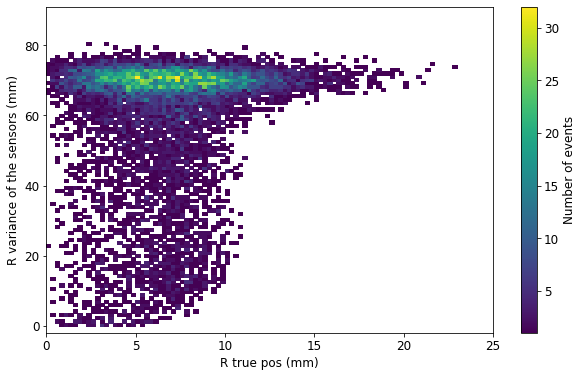

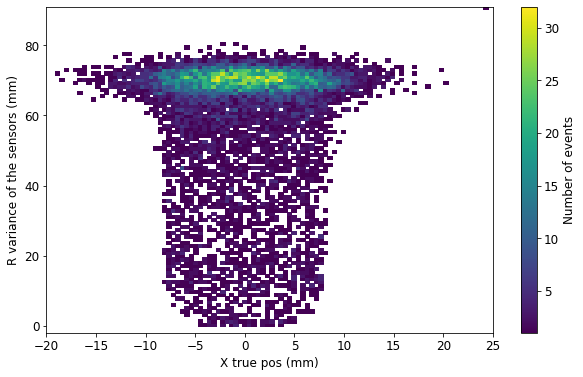

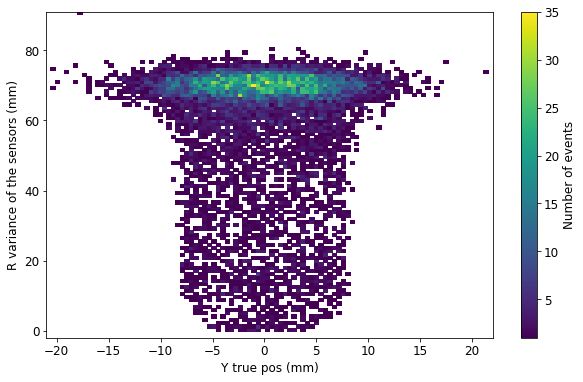

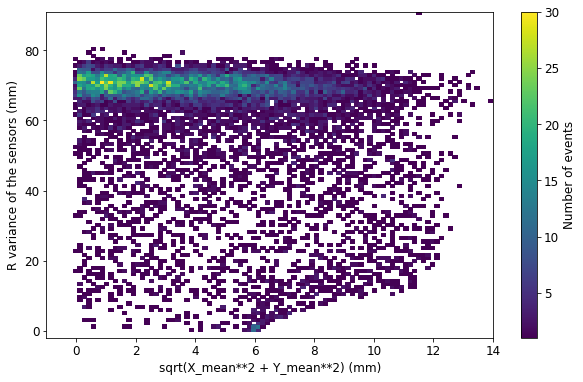

In [8]:
ranges = (1, 34), (-2, 91)
plt.hist2d(dist_true_sens_module, all_var_rs, bins=(100, 100), range=ranges, cmin=1)
plt.xlabel('Euclidean dist between true pos and the sens with max charge (mm)')
plt.ylabel('R variance of the sensors (mm)')
plt.colorbar().set_label("Number of events")
plt.show()

ranges = (1, 34), (-2, 91)
plt.hist2d(dist_ztrue_zsens, all_var_rs, bins=(100, 100), range=ranges, cmin=1)
plt.xlabel('Distance between the true z pos and the plane of sensors (mm)')
plt.ylabel('R variance of the sensors (mm)')
plt.colorbar().set_label("Number of events")
plt.show()

ranges = (-55, -26), (-2, 91)
plt.hist2d(tpos_zs, all_var_rs, bins=(100, 100), range=ranges, cmin=1)
plt.xlabel('Z true pos (mm)')
plt.ylabel('R variance of the sensors (mm)')
plt.colorbar().set_label("Number of events")
plt.show()

ranges = (5, 23), (-2, 91)
plt.hist2d(all_mean_rs, all_var_rs, bins=(100, 100), range=ranges, cmin=1)
plt.xlabel('R mean sensors (mm)')
plt.ylabel('R variance of the sensors (mm)')
plt.colorbar().set_label("Number of events")
plt.show()

ranges = (0, 25), (-2, 91)
plt.hist2d(tpos_rs, all_var_rs, bins=(100, 100), range=ranges, cmin=1)
plt.xlabel('R true pos (mm)')
plt.ylabel('R variance of the sensors (mm)')
plt.colorbar().set_label("Number of events")
plt.show()

ranges = (-20, 25), (-2, 91)
plt.hist2d(tpos_xs, all_var_rs, bins=(100, 100), range=ranges, cmin=1)
plt.xlabel('X true pos (mm)')
plt.ylabel('R variance of the sensors (mm)')
plt.colorbar().set_label("Number of events")
plt.show()

ranges = (-21, 22), (-2, 91)
plt.hist2d(tpos_ys, all_var_rs, bins=(100, 100), range=ranges, cmin=1)
plt.xlabel('Y true pos (mm)')
plt.ylabel('R variance of the sensors (mm)')
plt.colorbar().set_label("Number of events")
plt.show()

pos_r_from_xy_mean  = np.sqrt(all_mean_xs**2 + all_mean_xs**2)
ranges = (-1, 14), (-2, 91)
plt.hist2d(pos_r_from_xy_mean, all_var_rs, bins=(100, 100), range=ranges, cmin=1)
plt.xlabel('sqrt(X_mean**2 + Y_mean**2) (mm)')
plt.ylabel('R variance of the sensors (mm)')
plt.colorbar().set_label("Number of events")
plt.show()

### Mean of the R sensor position of the sensors weighted with their charge

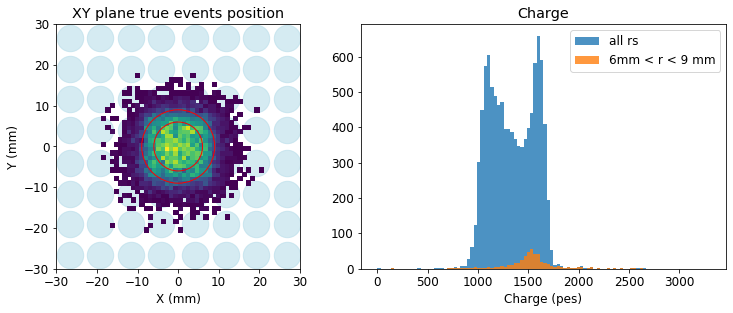

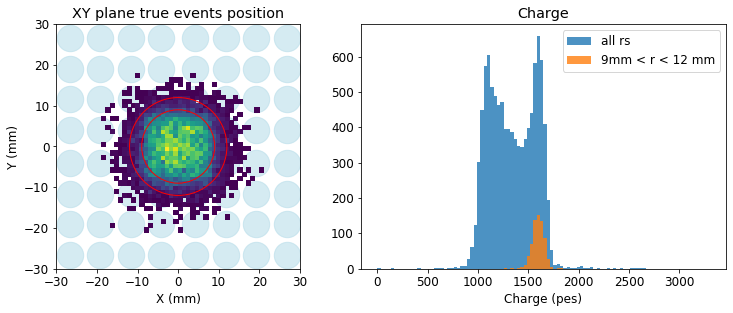

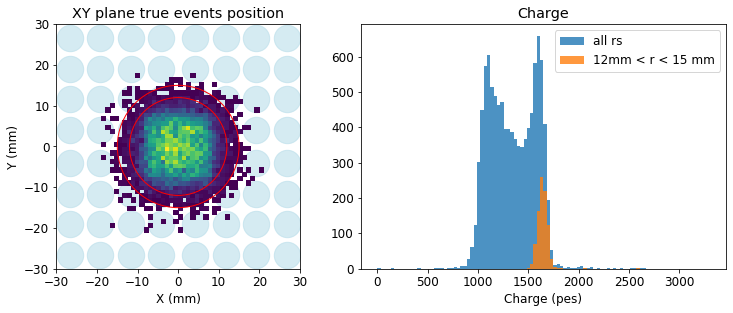

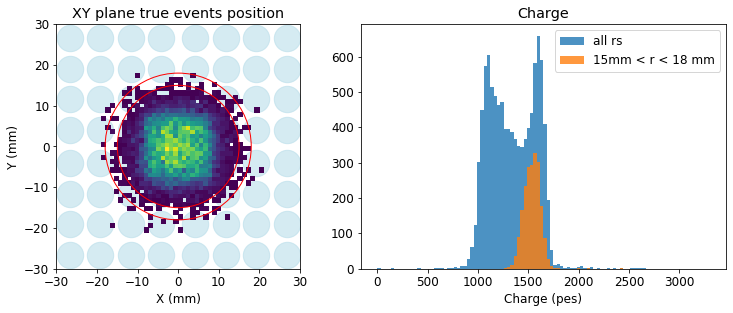

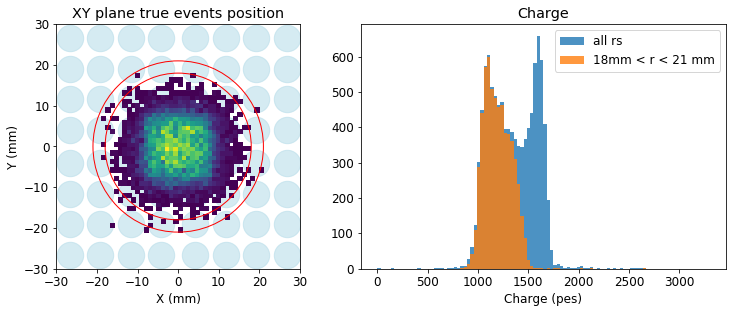

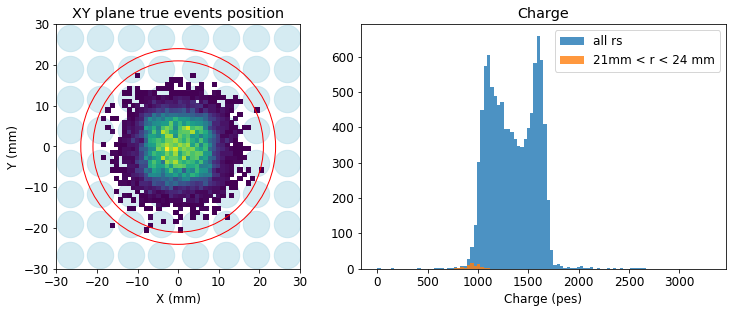

In [9]:
plt.rcParams["font.size"]      = 12

ch_range = (0, 3300)
center_point = (0., 0.)

steps = 3
for lower_lim_r in range(6, 24, steps):
    upper_lim_r = lower_lim_r + steps
    sel  = (all_mean_rs > lower_lim_r) & (all_mean_rs < upper_lim_r)
    bins = np.histogram(np.hstack((tot_charges, tot_charges[sel])), bins=100, range=ch_range)[1]
    
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,4.5),gridspec_kw={'width_ratios': [1, 1.5]})
    for x in sorted_sns_pos[sorted_sns_pos.z<0].x.unique():
        for y in sorted_sns_pos[sorted_sns_pos.z<0].y.unique():
            ax0.scatter(x, y, marker='o', s=700, color='lightblue', alpha=0.5)

    ax0.hist2d(tpos_xs, tpos_ys, bins=(40, 40), range=(ranges_xy, ranges_xy), cmin=1)
    ax0.set_title(f'XY plane true events position')
    ax0.set_xlabel('X (mm)')
    ax0.set_ylabel('Y (mm)')
    circ1 = plt.Circle(center_point, lower_lim_r, color='r', fill=False)
    circ2 = plt.Circle(center_point, upper_lim_r, color='r', fill=False)
    ax0.add_artist(circ1)
    ax0.add_artist(circ2)
    ax0.set_xlim(-30,30)
    ax0.set_ylim(-30,30)
    
    ax1.hist(tot_charges     , bins, ch_range, label=f'all rs', alpha=0.8)
    ax1.hist(tot_charges[sel], bins, ch_range, label=f'{lower_lim_r}mm < r < {upper_lim_r} mm', alpha=0.8)
    ax1.set_title(f'Charge')
    ax1.set_xlabel('Charge (pes)')
    ax1.legend(loc=1)
    
    plt.show()